In [13]:
from datasets import load_dataset
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
dataset = load_dataset('frgfm/imagenette',
                       'full_size')

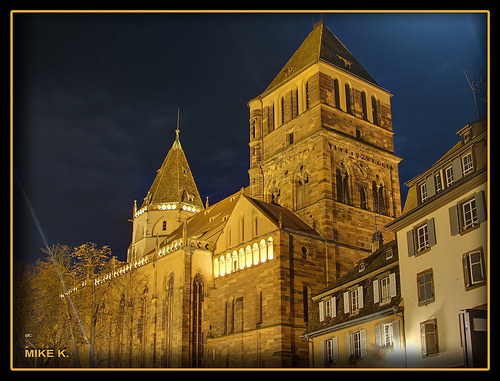

In [3]:
dataset['train'][3265]['image']

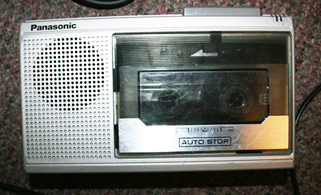

In [4]:
dataset['train'][304]['image']

In [5]:
images_nparrays = [np.array(dataset['train'][n]['image']) for n in range(len(dataset['train']))]

In [6]:
print('Image types are:', np.unique([len(img.shape) for img in images_nparrays]))

Image types are: [2 3]


In [15]:
images_gs = []
for img in images_nparrays:
    if img.shape[-1] == 3:
        images_gs.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    else:
        images_gs.append(img)

In [16]:
extractor = cv2.xfeatures2d.SIFT_create()

keypoints = []
descriptors = []

for img in images_gs:
    img_keypoints, img_descriptors = extractor.detectAndCompute(img, None)
    keypoints.append(img_keypoints)
    descriptors.append(img_descriptors)

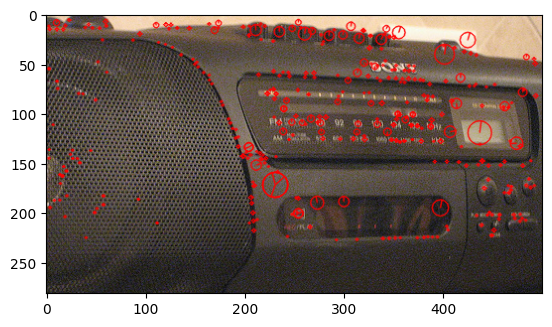

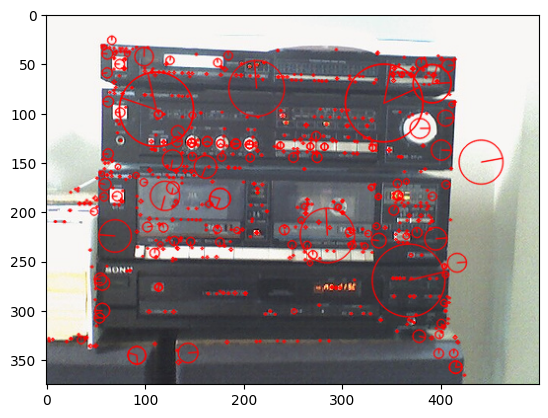

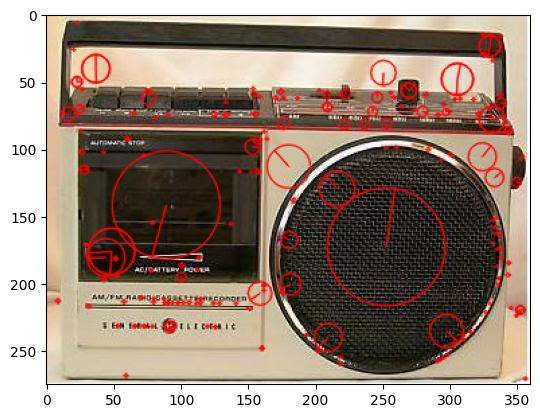

In [17]:
output_image = []
for x in range(3):
    output_image.append(cv2.drawKeypoints(images_nparrays[x],keypoints[x], 0, (255, 0, 0),
                                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
    plt.imshow(output_image[x], cmap='gray')
    plt.show()